In [1]:
!pip install kaggle
!pip install seaborn

import os

# Set the path to the Kaggle API credentials

os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset # Download dataset

!unzip breast-ultrasound-images-dataset.zip # unzip


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
breast-ultrasound-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-ultrasound-images-dataset.zip
replace Dataset_BUSI_with_GT/benign/benign (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating

We import the dataset and see that there is quite a lot of files to organize. There are subfolders that correspond to categories (benign, normal, malignant). We have to organize the data and put it into a format that can be manipulated before we can clean or preprocess the data.

In [2]:
# Import the os library

import os
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import tensorflow as tf
import numpy as np


# Change image_dir to the unzipped dataset path

image_dir = '/content/Dataset_BUSI_with_GT'
benign = '/content/Dataset_BUSI_with_GT/benign'
malignant = '/content/Dataset_BUSI_with_GT/malignant'
normal = '/content/Dataset_BUSI_with_GT/normal'
images = [benign, malignant, normal]


In [3]:
# Get all files in the directory
image_files = []
for folder_path in images:
  files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  image_files.extend(files)
print(image_files)

['benign (125)_mask.png', 'benign (239)_mask.png', 'benign (378)_mask.png', 'benign (419)_mask.png', 'benign (346)_mask_1.png', 'benign (110).png', 'benign (135)_mask.png', 'benign (427)_mask.png', 'benign (221).png', 'benign (238).png', 'benign (140).png', 'benign (253)_mask.png', 'benign (296)_mask.png', 'benign (338)_mask.png', 'benign (392)_mask.png', 'benign (412)_mask.png', 'benign (192)_mask.png', 'benign (321).png', 'benign (122)_mask.png', 'benign (161).png', 'benign (82).png', 'benign (54).png', 'benign (132).png', 'benign (81)_mask.png', 'benign (34).png', 'benign (129)_mask.png', 'benign (223)_mask.png', 'benign (421)_mask.png', 'benign (230).png', 'benign (208)_mask.png', 'benign (359)_mask.png', 'benign (350).png', 'benign (349)_mask.png', 'benign (57)_mask.png', 'benign (171).png', 'benign (345)_mask.png', 'benign (28).png', 'benign (434).png', 'benign (347).png', 'benign (315)_mask.png', 'benign (93)_mask_1.png', 'benign (300)_mask.png', 'benign (166).png', 'benign (2)_

The array image_files stores the names of all the image files. Names look like 'benign (125)_mask.png', which are added by a for loop checking for the appropriate file extension in the current folder_path. The list is then printed to check progress.

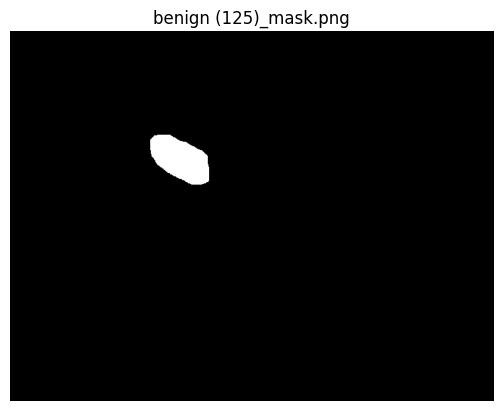

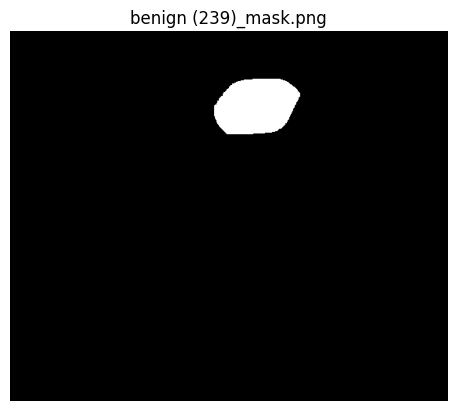

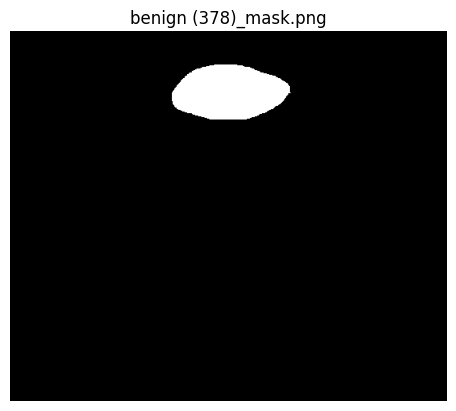

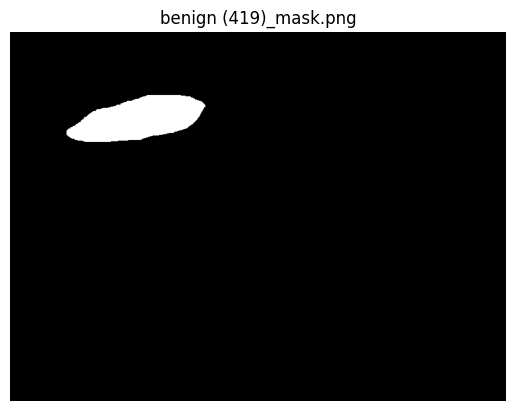

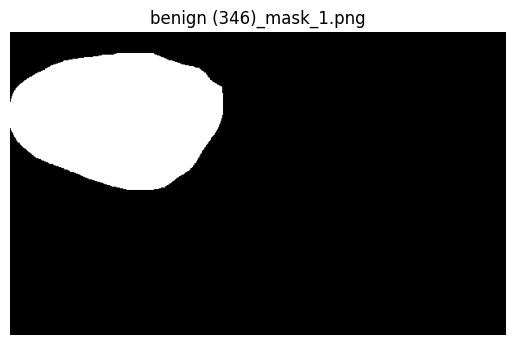

In [4]:
# Display all images
from tensorflow import keras
import matplotlib.pyplot as plt

for image_file in image_files[:5]:
    # Get the correct folder name from the 'images' list
    for folder_path in images:
        if image_file in os.listdir(folder_path):
            folder_name = os.path.basename(folder_path)
            break

    image_path = os.path.join(folder_path, image_file) # Correct the image path
    image = keras.utils.load_img(image_path)
    # Convert image to display - matplotlib
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')  # Turn off axis labels
    plt.show()

Outer for loop: displays the first five images in the list (image_files). Inner for loop and if statment: find correct folder path for the image in the image_file list. The code then joins the image file name and the folder path with image_path = os.path.join(folder_path, image_file). The object image is created and the image is loaded usint keras.utils.load_img. The image is loaded but not yet displayed until plt.imshow(image) is called using matplotlib.pyplot.imshow. The title is set as the name of the image (image_file)

In [5]:
image_dir = '/content/Dataset_BUSI_with_GT'
subfolders = ["benign", "malignant", "normal"]

In [6]:
image_path = []
image_label = []
image_data = []
for subfolder in subfolders:
  subfolder_path = os.path.join(image_dir, subfolder)
  # Get all image files in the subfolder
  image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  for i in image_files:
    image_path.append(os.path.join(subfolder_path, image_file))
    image_label.append(subfolder)
    image_data.append(image_file)


len(image_label)
len(image_data)

1578

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, image_label, test_size=0.2, random_state=42)

The code begins to use the path to the image and the subfolders. So far, we are still preprocessing. The nested for loop iterates through the subfolders and image files to populate the lists: image_path, image_label, and image_data. The lengths of these lists are checked against the lengths of the label and data lists.
Before we even start preprocessing, we split the data. As always we use a random_state seed to make our split random and our results more reproducable.

In [8]:
import numpy as np
X_train = np.array(X_train)
print(X_train.shape)
y_train = np.array(y_train)
print(y_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_test = np.array(y_test)
print(y_test.shape)


(1262,)
(1262,)
(316,)
(316,)


In [9]:
image_files

['normal (92)_mask.png',
 'normal (94).png',
 'normal (16)_mask.png',
 'normal (74)_mask.png',
 'normal (73)_mask.png',
 'normal (129)_mask.png',
 'normal (51).png',
 'normal (45)_mask.png',
 'normal (19).png',
 'normal (46).png',
 'normal (120)_mask.png',
 'normal (34).png',
 'normal (18)_mask.png',
 'normal (117).png',
 'normal (60)_mask.png',
 'normal (97).png',
 'normal (34)_mask.png',
 'normal (89)_mask.png',
 'normal (58)_mask.png',
 'normal (106).png',
 'normal (33)_mask.png',
 'normal (73).png',
 'normal (90)_mask.png',
 'normal (85)_mask.png',
 'normal (113).png',
 'normal (68)_mask.png',
 'normal (3).png',
 'normal (20).png',
 'normal (10).png',
 'normal (81)_mask.png',
 'normal (30).png',
 'normal (102)_mask.png',
 'normal (17)_mask.png',
 'normal (95)_mask.png',
 'normal (3)_mask.png',
 'normal (17).png',
 'normal (7).png',
 'normal (44).png',
 'normal (87).png',
 'normal (16).png',
 'normal (119)_mask.png',
 'normal (60).png',
 'normal (37)_mask.png',
 'normal (5)_mask.png

In [10]:
import tensorflow as tf

def f1_metric(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(tf.round(y_pred), tf.float32)
  tp = tf.reduce_sum(y_true * y_pred)
  fp = tf.reduce_sum((1 - y_true) * y_pred)
  fn = tf.reduce_sum(y_true * (1 - y_pred))

  precision = tp / (tp + fp + tf.keras.backend.epsilon())
  recall = tp / (tp + fn + tf.keras.backend.epsilon())
  f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
  return f1

In [11]:
#create an object for the model
cnn = tf.keras.models.Sequential()

In [12]:
# initialize the model and first hidden layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# max pooling - encoding
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
#second hidden layer and max pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# flatten dimensionality reduction
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
# thrid hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
# fourth hidden layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [18]:
# compile with adam as the optimizer, and accuracy as the metric
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'precision', 'recall', f1_metric])

In the code above we use the TensorFlow library to an object for the model, add layers to the CNN model.

Layers:
- Conv2d: convolutional layers for feature extraction
- MaxPool2D: Max pooling layers for downsampling
- Flatten: Flattens the output for the dense layers
-Dropout: drops some of the nodes randomly to decrease risk of overfitting
- Dense: Fully connects layers for classification

Then we use cnn.summary() to see the model layers we have made also called the model architecture.
Finally we compile the model with 'adam' as the optimizer

We are using f1 metric that is calculated directly using Tensorflow operations. This avoids any trouble shooting with numpy arrays within the metric function. We add tf.keras.backend.epsilon() to avoid dividing by zeros

In [19]:
# Create an ImageDataGenerator for training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
train_datagen = ImageDataGenerator(rescale=1./255,  # Rescale pixel values
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   brightness_range = (0.8, 1.2)
                                   )

ImageDataGenerator is something new that came up as we started to build neural networks. ImageDataGenerator is assigned to the object train_datagen.

ImageDataGenerator augments parameters such as:
- rescale = 1./225: Rescales pixel values with a range of [0,1]
- shear_range = 0.2: shearing is tilting the image, so the tilting direction is randomized at 20%.
- zoom_range=0.2: the zooming transformation is also randomized at 20%.
- horizontal_flip=True: randomizes the flipping of images in a horizontal direction.
- rotation_range=20: rotates 20 degrees randomly
- width_shift_range=0.2: 20% witdth shift randomly
- height_shift_range=0.2: 20% height shift randomly

The overall purpose of the ImageDataGenerator is to create variations of the images to prevent overfitting. These transformations also increase the size of the training set, which is sometimes very necessary for small datasets.

This step is the preprocessing before we can form our training set and start training the data. We will use train_datagen to incorporate images inot our model during training.

In [20]:
# Create an ImageDataGenerator for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# Create training data flow
training_set = train_datagen.flow_from_directory(
    image_dir,  # Path to the main image directory
    target_size=(64, 64),  # Resize images to match input shape
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class
    classes=subfolders
)

Found 1578 images belonging to 3 classes.


In [22]:
# Create test data flow
test_set = test_datagen.flow_from_directory(
    image_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class
    classes=subfolders
)

Found 1578 images belonging to 3 classes.


For the test data, we do not want to augment it. So only rescaling is applied in the line "test_datagen = ImageDataGenerator(rescale=1./255)
For the training set and test set, we use flow_from _directory to create data generators for both sets

The parameters are:
- image_dir: directory containing the images
- target_size: size for the resized images
- batch_size: number of images to process in each batch
- class_mode: classification problem type
- classes: classes from the list of subfolder names

We are now ready to train the CNN model.
We use the training_set that we just created.
We set the other parameters:
**steps_per_epoch**: number of batches to process in each epoch, the total number of training samples divided by the batch size
**epochs**: numbner of times to iterate over the entire training dataset
**validation_data**: test_set we just created used to validate the training
**validation_steps**: batches to process validation in each epoch.

In [23]:
# Fit the model - training
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)
cnn.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[lr_scheduler],
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 845ms/step - accuracy: 0.5170 - f1_metric: 0.3509 - loss: 0.9861 - precision: 0.5442 - recall: 0.2931 - val_accuracy: 0.5754 - val_f1_metric: 0.6014 - val_loss: 0.8605 - val_precision: 0.6284 - val_recall: 0.5754 - learning_rate: 0.0010
Epoch 2/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,f1_metric,loss,precision,recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 509ms/step - accuracy: 0.6131 - f1_metric: 0.5733 - loss: 0.8229 - precision: 0.6541 - recall: 0.5205 - val_accuracy: 0.6597 - val_f1_metric: 0.6647 - val_loss: 0.7448 - val_precision: 0.6677 - val_recall: 0.6572 - learning_rate: 0.0010
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 519ms/step - accuracy: 0.6482 - f1_metric: 0.6516 - loss: 0.7343 - precision: 0.6999 - recall: 0.6110 - val_accuracy: 0.6749 - val_f1_metric: 0.6741 - val_loss: 0.6820 - val_precision: 0.7023 - val_recall: 0.6534 - learning_rate: 0.0010
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.0000e+00 - f1_metric: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 617ms/step - accuracy: 0.6895 - f1_me

In [24]:
#make single prediction
from keras.preprocessing import image
import numpy as np

# Choose an image path
image_file_path = image_path[0]

test_image = image.load_img(image_file_path, target_size = (64, 64)) # Load using the path
test_image = image.img_to_array(test_image)


test_image = np.expand_dims(test_image, axis=0) # add a batch dimension
result = cnn.predict(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


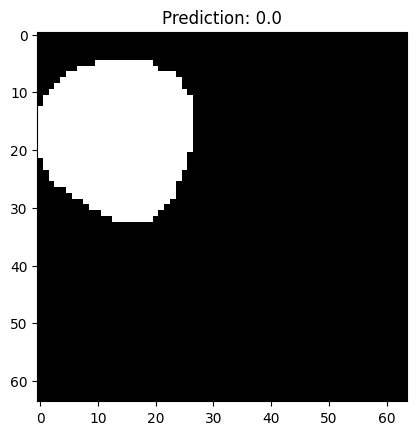

In [41]:
# Display the image using plt.imshow
plt.imshow(test_image[0]) # Display the first image in the batch
plt.title("Prediction: " + str(result[0][0]))  # Add a title with the prediction
plt.show()

We select an image path for prediction with image_file_path. Then test_image loads the image, converts it to an array and adds a batch dimension
The result is predicts the test image with the trained CNN model

In [26]:
training_set.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [27]:
if result[0][0] == 1:
  prediction = 'benign',
elif result[0][0] == 2:
  prediction = 'normal'
else:
  prediction = 'malignant'

In [28]:
print(prediction)

malignant


To access the dictionary that maps the class names (benign, normal, malignant) to the indicies of the dictionary they are stored in, we use training_set.class_indicies.

We then have a chain of if, elif, else statements to interpret those indicies and return the predicted class through the variable called prediction.

In [29]:
loss, accuracy, precision, recall, f1 = cnn.evaluate(test_set, steps=len(test_set))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.7071 - f1_metric: 0.7131 - loss: 0.6171 - precision: 0.7311 - recall: 0.6968
Test Loss: 0.6331545114517212
Test Accuracy: 0.7116603255271912
Test Precision: 0.739130437374115
Test Recall: 0.7002534866333008
Test F1-score: 0.7189056873321533


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step


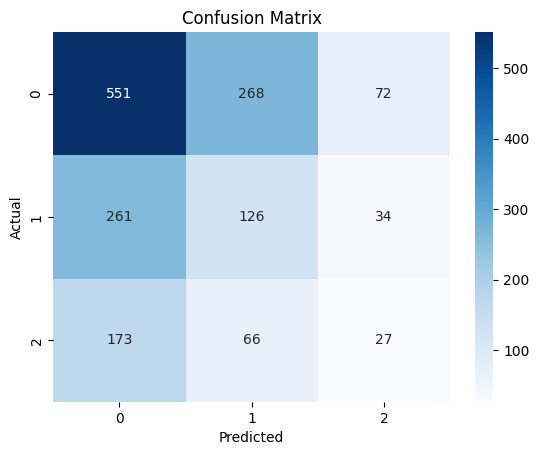

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = cnn.predict(test_set, steps=len(test_set))
y_pred_classes = np.argmax(y_pred, axis=1) # Convert pto class labels
cm = confusion_matrix(test_set.classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Analysis:

Accuracy: 74.4% The test accuracy is pretty good. The model is correctly classifying 74% of images in the test set.

Precision: 77.3% precise. Images predicted to belong to a specific class are about 77.3% correct.

Recall: 71.0% of the actual instances for each class are correctly identified

F1: 73.8% this number represents the difference between precision and recall.

Loss: 0.566% the loss function is actually quite low for multiple classification

The model's performance has a decent accuracy and demonstrates a good balance between precision (higher threshold) and recall(sensitivity, lower threshold). The appropriate loss function and output format is crucial and took some trial and error.

References

Dropout:
- https://saturncloud.io/blog/where-to-add-dropout-in-neural-network/#2

F1-score:
- https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score
- https://stackoverflow.com/questions/68596302/f1-score-metric-per-class-in-tensorflow

ImageDataGenerator:
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

ReduceLROnPlateau:
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

Loss Function, multiclass:
- https://discuss.pytorch.org/t/loss-function-for-multi-class-with-probabilities-as-output/60866
- https://medium.com/@nghihuynh_37300/understanding-loss-functions-for-classification-81c19ee72c2a
- https://stackoverflow.com/questions/59336899/which-loss-function-and-metrics-to-use-for-multi-label-classification-with-very

Metrics:
- https://scikit-learn.org/dev/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
- https://www.kaggle.com/code/kmkarakaya/multi-label-model-evaluation
- https://learn.microsoft.com/en-us/azure/machine-learning/how-to-understand-automated-ml?view=azureml-api-2
- https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
- https://arize.com/blog-course/f1-score/
- https://stackoverflow.com/questions/55984768/i-am-having-trouble-calculating-the-accuracy-recall-precision-and-f1-score-for
- https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score
- https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134



In [31]:
# Modified code from lab
# Importing necessary libraries for data visualization, data handling, and machine learning
import matplotlib.pyplot as plt  # For creating visualizations (plots)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import numpy as np  # For numerical computations and working with arrays
import seaborn as sns  # For statistical data visualization
import warnings  # For handling warnings in the code
# Ensuring compatibility with Python 2.x for print function if needed
from __future__ import print_function  # To use the print() function from Python 3 in Python 2.x

# Importing necessary modules from Keras for building neural networks
from keras.models import Model  # For defining and training machine learning models
from keras.layers import Dense, Input  # For defining layers in the neural network (Dense for fully connected layers, Input for input layer)
from keras.regularizers import l1  # For L1 regularization to prevent overfitting
from keras.optimizers import Adam  # Adam optimizer for model training

In [32]:
# Changed from Lab session
# Define the dimensions of the input, hidden layers, and encoded representation
input_size = 64 * 64 * 3  # Input size (for 64x64x3 images flattened into a 4096-dimensional vector)
hidden_size = 128  # Number of neurons in the hidden layers
code_size = 32  # Size of the encoded representation (bottleneck)

# Define the input layer with the specified input size
input_img = Input(shape=(input_size,))

# Define the first hidden layer with 128 neurons and ReLU activation
hidden_1 = Dense(hidden_size, activation='relu')(input_img)

# Define the encoded layer (code) with 32 neurons and ReLU activation
code = Dense(code_size, activation='relu')(hidden_1)

# Define the second hidden layer, which reconstructs the input size
hidden_2 = Dense(hidden_size, activation='relu')(code)

# Define the output layer to reconstruct the input image, using softmax activation
output_img = Dense(input_size, activation='softmax')(hidden_2)

# Create the autoencoder model, specifying input and output layers
autoencoder = Model(input_img, output_img)

# Compile the autoencoder model using the Adam optimizer and categorical cross-entropy loss
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

In [33]:
# Modified code from lab
# X_train Load and preprocess images before training
X_train_images = []
for img_path in X_train:
  # Find the subfolder where the image belongs
  for subfolder in subfolders:
    if img_path in os.listdir(os.path.join(image_dir, subfolder)):
      full_path = os.path.join(image_dir, subfolder, img_path)
      break

  img = keras.utils.load_img(full_path, target_size=(64, 64))  # Load image
  img = keras.utils.img_to_array(img)  # Convert to array
  img = img / 255.0  # Rescale pixel values
  img = img.flatten() # Flatten the image before appending
  X_train_images.append(img)
X_train_images = np.array(X_train_images)



In [34]:
# Modified code from lab
# Train the autoencoder on the training data, using the same data for both input and output (autoencoder)
autoencoder.fit(X_train_images, X_train_images, epochs=10)  # Training for 3 epochs

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 21050.9980
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 243634.1094
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1609054.2500
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4929993.0000
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 11525234.0000
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 22911488.0000
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 38971996.0000
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 60547300.0000
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 89374304.0000
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 126374360.0000


In [35]:
# Modified code from lab
# X_test Load and preprocess images before prediction
X_test_images = []
for img_path in X_test:
  # Find the subfolder where the image belongs
  for subfolder in subfolders:
    if img_path in os.listdir(os.path.join(image_dir, subfolder)):
      full_path = os.path.join(image_dir, subfolder, img_path)
      break

  img = keras.utils.load_img(full_path, target_size=(64, 64))  # Load image
  img = keras.utils.img_to_array(img)  # Convert to array
  img = img / 255.0  # Rescale pixel values
  img = img.flatten() # Flatten the image before appending
  X_test_images.append(img)
X_test_images = np.array(X_test_images)


In [36]:
# Modified code from lab
# Generate the reconstructed (decoded) images from the autoencoder
decoded_imgs = autoencoder.predict(X_test_images)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


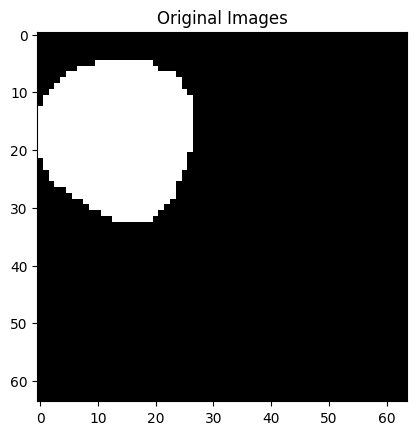

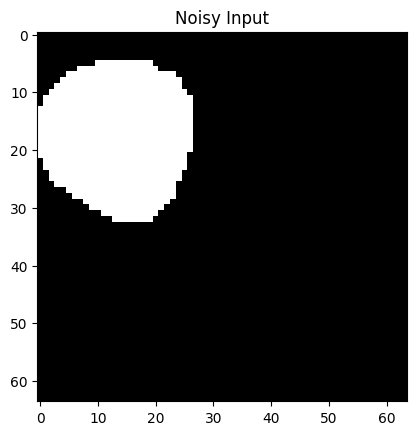

In [37]:
# Modified code from lab
# Define the noise factor (standard deviation of the Gaussian noise to add to the images)
noise_factor = 0.4

# X_train Load and preprocess images before training
X_train_float = []
for img_path in X_train:
    X_train_float.append(img)  # Append the processed image data
X_train_float = np.array(X_train_float) # Convert to NumPy array

# X_test Load and preprocess images before training
X_test_float = []
for img_path in X_test:
    X_test_float.append(img)  # Append the processed image data
X_test_float = np.array(X_test_float) # Convert to NumPy array


# Add random Gaussian noise to the training and test images
X_train_noisy = X_train_float + noise_factor * np.random.normal(size=X_train_float.shape)
X_test_noisy = X_test_float + noise_factor * np.random.normal(size=X_test_float.shape)

# Clip the noisy images to ensure pixel values stay within the range [0, 1]
x_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)
plt.imshow(X_test_float[0].reshape(64, 64, 3))  # Reshape to (64, 64, 3) for a color image
plt.title('Original Images')
plt.show()
plt.imshow(X_test_float[0].reshape(64, 64, 3))  # Reshape to (64, 64, 3) for a color image
plt.title('Noisy Input')
plt.show()

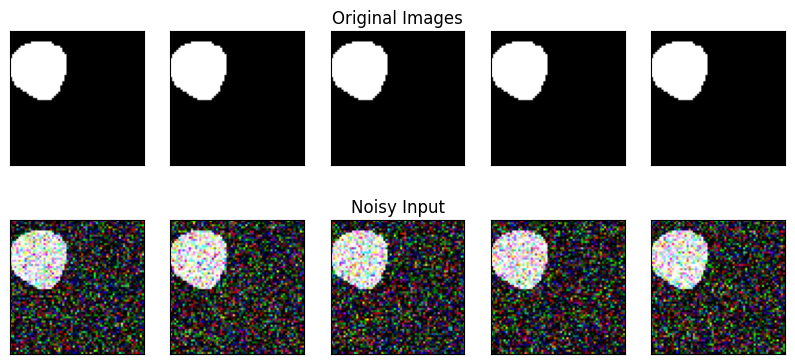

In [38]:
# Modified code from lab
# Set the number of example digits to display
n = 5

# Create a figure to display the original and noisy images
plt.figure(figsize=(10, 4.5))

# Loop over the first n images to plot their original and noisy versions
for i in range(n):
    # Load and preprocess the original image
    img_path = X_test[i]
    for subfolder in subfolders:
        if img_path in os.listdir(os.path.join(image_dir, subfolder)):
            full_path = os.path.join(image_dir, subfolder, img_path)
            break
    original_img = keras.utils.load_img(full_path, target_size=(64, 64))
    original_img = keras.utils.img_to_array(original_img) / 255.0  # Rescale

    # Plot the original image in the top row
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(original_img)  # Display the loaded and preprocessed image
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Plot the noisy image in the bottom row
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Input')

# Display the plot
plt.show()

In [39]:
# Modified code from lab
# Define the input size, hidden layer size, and code (bottleneck) size for the autoencoder
input_size = 64 * 64 *3
hidden_size = 128  # Number of neurons in the hidden layers
code_size = 32  # Size of the encoded representation (bottleneck layer)

# Define the input layer with the specified input size
input_img = Input(shape=(input_size,))

# First hidden layer with ReLU activation
hidden_1 = Dense(hidden_size, activation='relu')(input_img)

# Code (bottleneck) layer with 32 neurons and ReLU activation
code = Dense(code_size, activation='relu')(hidden_1)

# Second hidden layer with ReLU activation, taking input from the code layer
hidden_2 = Dense(hidden_size, activation='relu')(code)

# Output layer, reconstructing the original input, with a softmax activation
output_img = Dense(input_size, activation='softmax')(hidden_2)

# Create the autoencoder model with the input and output layers
autoencoder_noisy = Model(input_img, output_img)

# Compile the model using the Adam optimizer and categorical cross-entropy loss function
autoencoder_noisy.compile(optimizer='adam', loss='categorical_crossentropy')

X_train_images = []
for img_path in X_train:
    # Find the subfolder where the image belongs
    for subfolder in subfolders:
        if img_path in os.listdir(os.path.join(image_dir, subfolder)):
            full_path = os.path.join(image_dir, subfolder, img_path)
            break  # Exit the inner loop once the image is found

    # Load the image, convert to array, and rescale
    img = keras.utils.load_img(full_path, target_size=(64, 64))
    img = keras.utils.img_to_array(img)
    img = img / 255.0
    img = img.flatten()  # If your autoencoder requires flattened input
    X_train_images.append(img)  # Append the processed image data

# Convert the list of images into a NumPy array
X_train_images = np.array(X_train_images)

# Add random Gaussian noise to the training images
X_train_noisy = X_train_images + noise_factor * np.random.normal(size=X_train_images.shape)

# Clip the noisy images to ensure pixel values stay within the range [0, 1]
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)

# Train the autoencoder model
# Use X_train_images (original images) as the target for reconstruction
autoencoder_noisy.fit(X_train_noisy, X_train_images, epochs=10) # Changed X_train to X_train_images


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 33279.4453
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 547962.6250
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3152904.2500
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 10835492.0000
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 26716880.0000
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 53235696.0000
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 92860528.0000
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 146243328.0000
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 212786784.0000
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 299673248.0000


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


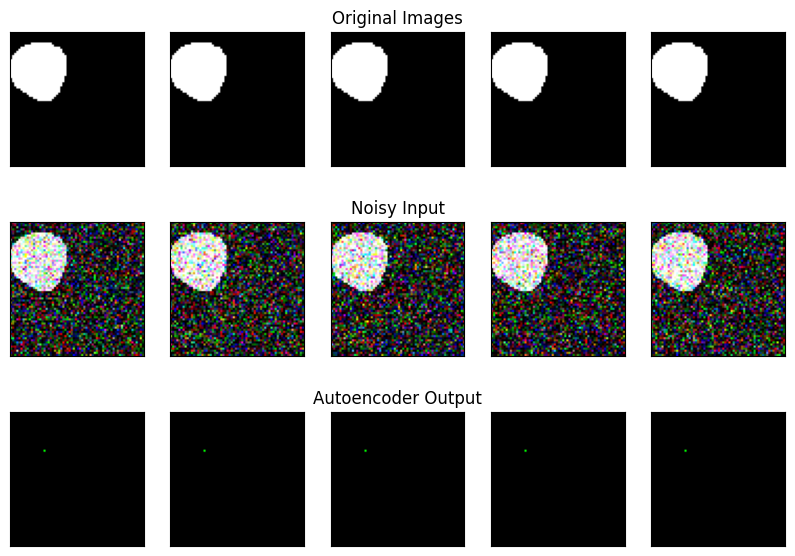

In [40]:
# Modified code from lab
# Set the number of images to display
n = 5

# Create a figure to display the original, noisy, and autoencoder output images
plt.figure(figsize=(10, 7))

# Generate the denoised (reconstructed) images using the trained autoencoder
# Changed autoencoder to autoencoder_noisy
images = autoencoder_noisy.predict(X_test_noisy)

# Loop over the first n images to plot their original, noisy, and reconstructed versions
for i in range(n):
    # Load and preprocess the original image
    img_path = X_test[i]
    for subfolder in subfolders:
        if img_path in os.listdir(os.path.join(image_dir, subfolder)):
            full_path = os.path.join(image_dir, subfolder, img_path)
            break
    # Load the original image and reshape for display
    original_img = keras.utils.load_img(full_path, target_size=(64, 64))
    original_img = keras.utils.img_to_array(original_img) / 255.0  # Rescale

    # Plot the original image in the top row
    ax = plt.subplot(3, n, i + 1)  # Create a subplot for the original image
    plt.imshow(original_img)  # Display the loaded and preprocessed image
    plt.gray()  # Use grayscale for the image
    ax.get_xaxis().set_visible(False)  # Hide the x-axis for a cleaner plot
    ax.get_yaxis().set_visible(False)  # Hide the y-axis for a cleaner plot
    if i == n // 2:  # Add a title in the middle
        ax.set_title('Original Images')

    # Plot the noisy image in the middle row
    ax = plt.subplot(3, n, i + 1 + n)  # Create a subplot for the noisy image
    plt.imshow(x_test_noisy[i].reshape(64, 64, 3))  # Reshape and display the noisy image (64x64)
    plt.gray()  # Use grayscale for the image
    ax.get_xaxis().set_visible(False)  # Hide the x-axis
    ax.get_yaxis().set_visible(False)  # Hide the y-axis
    if i == n // 2:  # Add a title in the middle
        ax.set_title('Noisy Input')

    # Plot the autoencoder's output (denoised) image in the bottom row
    ax = plt.subplot(3, n, i + 1 + 2*n)  # Create a subplot for the reconstructed image
    plt.imshow(images[i].reshape(64, 64, 3))  # Reshape and display the reconstructed image (64x64)
    plt.gray()  # Use grayscale for the image
    ax.get_xaxis().set_visible(False)  # Hide the x-axis
    ax.get_yaxis().set_visible(False)  # Hide the y-axis
    if i == n // 2:  # Add a title in the middle
        ax.set_title('Autoencoder Output')

# Display the plot
plt.show()

Autoencoder class is made by subclassing tf.keras.Model
This auto encoder is used to denoise the images from the breast ultrasound image dataset.

1. PreProcessing:
  - load the image from the previously created (image_dir)
  - resize the image, may not be necessary, just in case
  - normalize the image, this was done previously in preprocessing for CNN, we are doing it again here
  - flatten to 1D array
2. Autoencoder Architecture
  - Keras function API
  - layers: input layer, two hidden layers (encoder, decoder), and an output layer
  - hidden layers use ReLU
  - output layer uses softmax
3. Training
  - autoencoder trained on preprocessed images (X_train_images)
  - trained for 10 epochs with Adam as the optimizer and categorical cross-entropy as the loss function
4. Denoising
  - using the code from the autoencoder lab, the Gaussian noise is added to the original images
  - the autoencoder is trained and then denoises the images
5. Visualization
  - the denoised images are plotted. The denoised images do not look like the original. Perhaps this has to do with the fact that the printed images are from the masked dataset. With more time and experience perhaps the programmer could do a better job with the dataset.



References AutoEncoder:
- https://www.pyquantnews.com/the-pyquant-newsletter/use-autoencoders-to-create-feature-embeddings

- https://www.tensorflow.org/tutorials/generative/autoencoder


- https://pierre-schwartz.medium.com/introduction-aux-auto-encodeurs-61e8d74660f3
- https://hex.tech/blog/autoencoders-for-feature-selection/

- https://www.mathworks.com/matlabcentral/answers/1619715-how-do-i-find-the-features-extracted-from-input-data-set-using-auto-encoder
- https://stackoverflow.com/questions/55920986/how-to-feed-time-series-data-into-an-autoencoder-network-for-feature-extraction

- https://blog.keras.io/building-autoencoders-in-keras.html

- https://mallahyari.github.io/ml_tutorial/autoencoder/